<h2><center>ERD<center></h2>

![Image of Yaktocat](https://github.com/nkdxgxh/Course5961A_ZengShuman1155160734/blob/main/ERD.png?raw=true)

[Click here, if the picture fails.](https://github.com/nkdxgxh/Course5961A_ZengShuman1155160734/blob/main/ERD.png)

<h2><center>Programing</center></h2>

In [20]:
import sqlite3
import pandas as pd 
con = sqlite3.connect('D:\\CUHK\Bernard\SQL\chinook\chinook.db')
cursor = con.cursor()
# If I want to get the top 10 genres directly:
# sql="SELECT genres.Name AS Genres,count(genres.GenreId) AS Count FROM tracks INNER JOIN genres ON tracks.GenreId=genres.GenreId group by genres.Name order by count DESC LIMITED 10;"
sql="SELECT trackid,tracks.name,albums.Title AS album, media_types.Name AS media,genres.Name AS genres FROM tracks INNER JOIN albums ON Albums.AlbumId = tracks.AlbumId INNER JOIN media_types ON media_types.MediaTypeId = tracks.MediaTypeId INNER JOIN genres ON genres.GenreId = tracks.GenreId;"
try:
    cursor.execute(sql)
    con.commit()
    print("Entry successfully retrieved.")
except Exception as e:
    print("Exception occurred.",e)
result1 = cursor.fetchall()
df = pd.DataFrame(result1,columns=['TrackId','Name','Album','Media','Genres'])
df

Entry successfully retrieved.


,TrackId,Name,Album,Media,Genres
0,1,For Those About To Rock (We Salute You),For Those About To Rock We Salute You,MPEG audio file,Rock
1,2,Balls to the Wall,Balls to the Wall,Protected AAC audio file,Rock
2,3,Fast As a Shark,Restless and Wild,Protected AAC audio file,Rock
3,4,Restless and Wild,Restless and Wild,Protected AAC audio file,Rock
4,5,Princess of the Dawn,Restless and Wild,Protected AAC audio file,Rock
...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,Respighi:Pines of Rome,Protected AAC audio file,Classical
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Schubert: The Late String Quartets & String Qu...,Protected AAC audio file,Classical
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",Monteverdi: L'Orfeo,Protected AAC audio file,Classical
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Mozart: Chamber Music,Protected AAC audio file,Classical


In [23]:
#  Save as csv file
df = pd.read_sql_query(sql,con)
df.to_csv('new.csv',mode='w',index=False)
print("There is a csv file called 'new'.")

There is a csv file called 'new'.


In [26]:
# Save the csv file as a new table
df = pd.read_csv('new.csv')
df
df.to_sql('new',con,if_exists='append',index=False)
print("There is a new table in the database.")
df

There is a new table in the database.


,TrackId,Name,album,media,genres
0,1,For Those About To Rock (We Salute You),For Those About To Rock We Salute You,MPEG audio file,Rock
1,2,Balls to the Wall,Balls to the Wall,Protected AAC audio file,Rock
2,3,Fast As a Shark,Restless and Wild,Protected AAC audio file,Rock
3,4,Restless and Wild,Restless and Wild,Protected AAC audio file,Rock
4,5,Princess of the Dawn,Restless and Wild,Protected AAC audio file,Rock
...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,Respighi:Pines of Rome,Protected AAC audio file,Classical
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Schubert: The Late String Quartets & String Qu...,Protected AAC audio file,Classical
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",Monteverdi: L'Orfeo,Protected AAC audio file,Classical
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Mozart: Chamber Music,Protected AAC audio file,Classical


In [24]:
sql1="SELECT genres AS Genres, count(genres) AS Count FROM new GROUP BY genres ORDER BY count DESC;"
try:
    cursor.execute(sql1)
    con.commit()
    print("Successfully.")
except Exception as e:
    print("Exception occurred.",e)    
result = cursor.fetchall()
df1 = pd.DataFrame(result, columns=['Genres','Count'])
df1=df1.head(10)
df1

Successfully.


,Genres,Count
0,Rock,7782
1,Latin,3474
2,Metal,2244
3,Alternative & Punk,1992
4,Jazz,780
5,TV Shows,558
6,Blues,486
7,Classical,444
8,Drama,384
9,R&B/Soul,366


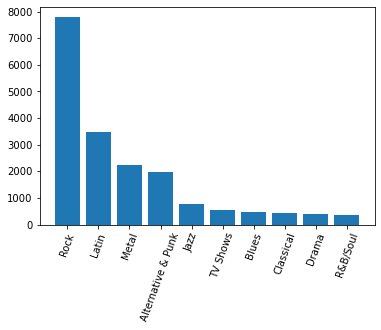

In [25]:
from matplotlib import pyplot as plt
genres=df1.Genres
count=df1.Count
ax=plt.subplot()
plt.bar(range(len(genres)),count)
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_xticklabels(genres,rotation=70)
plt.show()